### Making necessary imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
#!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
import sys
print(sys.executable)

/anaconda3/bin/python


### Loading and manipulating data

Downloaded two dataframes with pandas: fake and real news 

In [5]:
fake_df = pd.read_csv("NewsData/Fake.csv")

In [6]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_df = pd.read_csv("NewsData/True.csv")

In [8]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Adding additional column with a label "fake" or "real" before merging two dataframes into one. 

In [9]:
fake_df["flag"] = 0
true_df["flag"] = 1

In [10]:
fake_df.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
true_df.head()

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
fake_df.shape

(23481, 5)

In [13]:
true_df.shape

(21417, 5)

Joining two dataframes into one 

In [14]:
news_df = fake_df.copy()

In [15]:
news_df = news_df.append(true_df)

In [16]:
news_df.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
news_df.shape

(44898, 5)

In [18]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
flag       44898 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


Cleaning from duplicates (test dataframe)

In [19]:
news_df = news_df.drop_duplicates()

In [20]:
news_df.shape

(44689, 5)

In [21]:
news_df = news_df.reset_index(drop=True)

In [22]:
news_df.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [23]:
news_df.tail()

,title,text,subject,date,flag
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44688,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [24]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
title      44689 non-null object
text       44689 non-null object
subject    44689 non-null object
date       44689 non-null object
flag       44689 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Changing date format datetime

In [25]:
news_df2 = news_df.copy()

In [26]:
news_df.shape

(44689, 5)

In [27]:
news_df2.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [28]:
news_df2.date.unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'January 15, 2016 ', 'January 14, 2016 ', 'January 13, 2016 '],
      dtype=object)

In [29]:
news_df2['date'] = pd.to_datetime(news_df2['date'], errors = 'coerce')

In [30]:
news_df2 = news_df2.dropna(axis=0)

In [31]:
news_df2.shape

(44679, 5)

In [32]:
df_todrop = news_df2[news_df2['date'].isnull()]

Changing date format datetime as a new column (working with original dataframe)

In [35]:
news_df['datetime'] = news_df['date']

In [36]:
news_df.head()

,title,text,subject,date,flag,datetime
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"December 25, 2017"


In [37]:
news_df['datetime'] = pd.to_datetime(news_df['datetime'], errors = 'coerce')

In [38]:
news_df.shape

(44689, 6)

In [39]:
news_df = news_df.dropna(axis=0)

In [40]:
news_df.shape

(44679, 6)

In [41]:
news_df.head()

,title,text,subject,date,flag,datetime
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2017-12-25


### Working with non-text data 

In [42]:
news_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [43]:
news_df['year'] = pd.to_datetime(news_df['datetime']).dt.to_period('Y')
news_df['month'] = pd.to_datetime(news_df['datetime']).dt.to_period('M')

news_df['month'] = news_df['month'].astype(str)


In [44]:
news_df.head()

,title,text,subject,date,flag,datetime,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2017-12-31,2017,2017-12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,2017-12-31,2017,2017-12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,2017-12-30,2017,2017-12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2017-12-29,2017,2017-12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2017-12-25,2017,2017-12


In [45]:
plotting1 = news_df[['month', 'flag']]

In [46]:
plotting1 = (plotting1.groupby(['month', 'flag']).apply(lambda x: (x['flag'] == 1).count()).reset_index(name='count'))

In [47]:
news_df[news_df['month'] == '2015-03']

,title,text,subject,date,flag,datetime,year,month
15882,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,"Mar 31, 2015",0,2015-03-31,2015,2015-03
15883,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,"Mar 31, 2015",0,2015-03-31,2015,2015-03
15884,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,"Mar 31, 2015",0,2015-03-31,2015,2015-03
15885,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,"Mar 31, 2015",0,2015-03-31,2015,2015-03
15886,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,"Mar 31, 2015",0,2015-03-31,2015,2015-03
15887,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,"Mar 31, 2015",0,2015-03-31,2015,2015-03
21915,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,"Mar 31, 2015",0,2015-03-31,2015,2015-03
21916,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,"Mar 31, 2015",0,2015-03-31,2015,2015-03


In [48]:
plotting1_1 = plotting1[plotting1['flag'] == 1]
plotting_0 = plotting1[plotting1['flag'] == 0]

In [49]:
print(plotting1.shape)
print(plotting1_1.shape)
print(plotting_0.shape)

(59, 3)
(24, 3)
(35, 3)


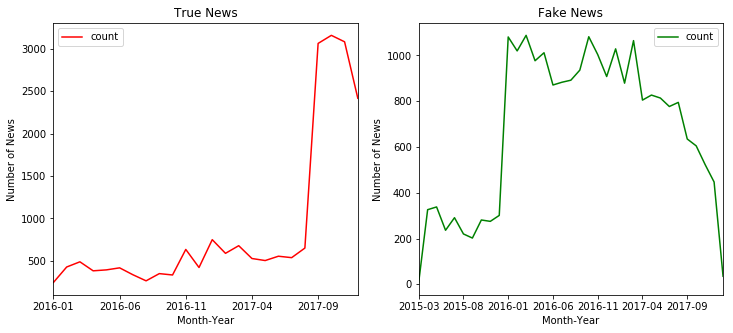

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plotting1_1.plot(ax=ax[0], x='month', y='count', color='red')
ax[0].set_title('True News')
ax[0].set_xlabel('Month-Year')
ax[0].set_ylabel('Number of News')

plotting_0.plot(ax=ax[1], x='month', y='count', color='green')
ax[1].set_title('Fake News')
ax[1].set_xlabel('Month-Year')
ax[1].set_ylabel('Number of News')

plt.show()

In [51]:
sub = news_df[['month', 'flag']]
sub = sub.groupby(['month'])['flag'].sum()

In [52]:
plotting_sub = news_df[['subject', 'flag']]
plotting_sub = (plotting_sub.groupby(['subject', 'flag']).apply(lambda x: (x['flag'] == 1).count()).reset_index(name='count'))

In [53]:
plotting_sub_0 = plotting_sub[plotting_sub['flag'] == 0]
plotting_sub_1 = plotting_sub[plotting_sub['flag'] == 1]

In [54]:
print(plotting_sub.shape)
print(plotting_sub_0.shape)
print(plotting_sub_1.shape)

(8, 3)
(6, 3)
(2, 3)


In [55]:
plotting_sub_1

,subject,flag,count
6,politicsNews,1,11220
7,worldnews,1,9991


In [56]:
plotting_sub_0

,subject,flag,count
0,Government News,0,1568
1,Middle-east,0,778
2,News,0,9050
3,US_News,0,783
4,left-news,0,4456
5,politics,0,6833


In [57]:
plotting_sub

,subject,flag,count
0,Government News,0,1568
1,Middle-east,0,778
2,News,0,9050
3,US_News,0,783
4,left-news,0,4456
5,politics,0,6833
6,politicsNews,1,11220
7,worldnews,1,9991


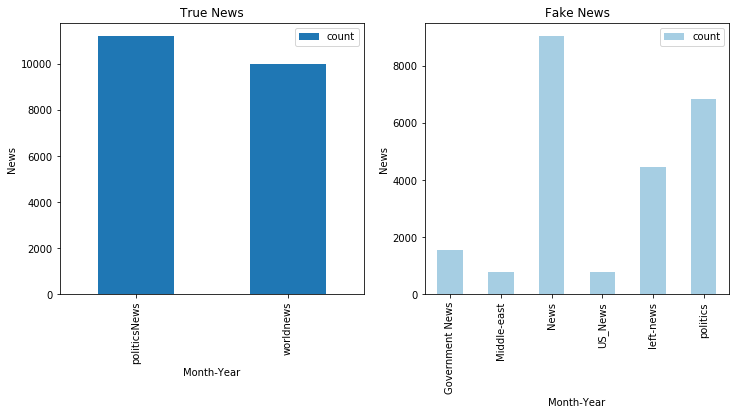

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plotting_sub_1.plot.bar(ax=ax[0], x='subject', y='count')
ax[0].set_title('True News')
ax[0].set_xlabel('Month-Year')
ax[0].set_ylabel('News')

plotting_sub_0.plot.bar(ax=ax[1], x='subject', y='count', colormap='Paired')
ax[1].set_title('Fake News')
ax[1].set_xlabel('Month-Year')
ax[1].set_ylabel('News')

plt.show()

### Word Cloud

In [59]:
nlp_alg = news_df.copy()

In [60]:
nlp_alg.head()

,title,text,subject,date,flag,datetime,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2017-12-31,2017,2017-12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,2017-12-31,2017,2017-12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,2017-12-30,2017,2017-12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2017-12-29,2017,2017-12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2017-12-25,2017,2017-12


In [61]:
comment_words = '' 
stopwords = set(STOPWORDS)

#### Word Cloud for Fake News 

In [64]:
# Slice part of fake news to look at vocabulary
fake_slice = nlp_alg[nlp_alg['flag'] == 0]['title'].iloc[0:500] 

In [65]:
fake_slice.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: title, dtype: object

In [76]:
for val in fake_slice:
    #val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+""

In [77]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='lightblue', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

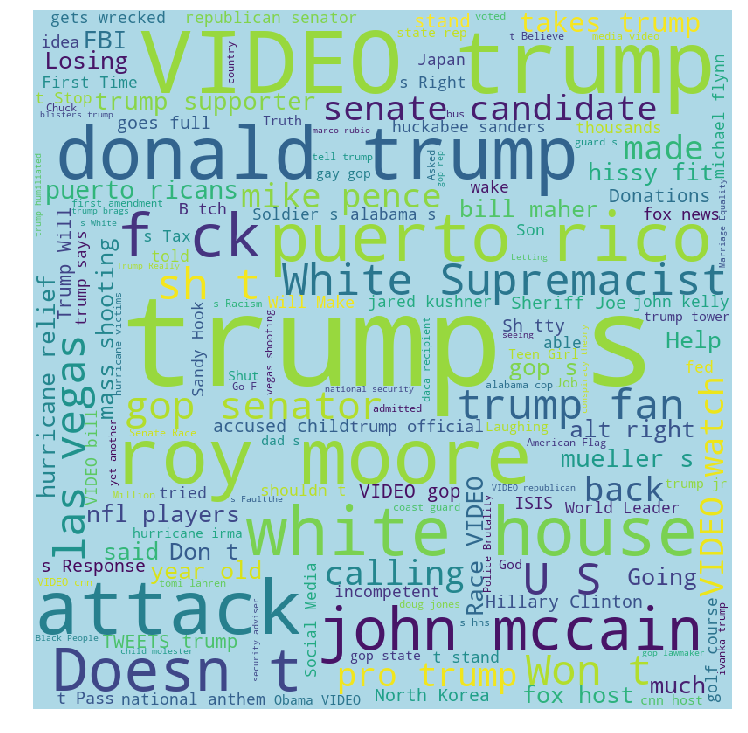

In [78]:
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#### Word Cloud for Real News

In [79]:
# Slice part of real news to look at vocabulary
real_slice = nlp_alg[nlp_alg['flag'] == 1]['title'].iloc[0:500] 

In [87]:
vectorizer_model = TfidfVectorizer(stop_words='english')
vectors = vectorizer_model.fit_transform(real_slice)
feature_names = vectorizer_model.get_feature_names()
dense = vectors.todense()
list_of_words = dense.tolist()
data = pd.DataFrame(list_of_words, columns=feature_names)
data

,10,11,12,14,15,18,19,20,2016,2017,...,worried,worry,wrapped,wray,write,writer,wrong,year,years,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [98]:
data.T.sum(axis=1)
Cloud = WordCloud(background_color="lightblue", max_words=150).generate_from_frequencies(data.T.sum(axis=1))

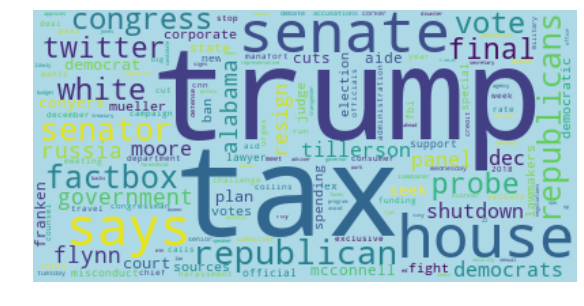

In [100]:
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Splitting the dataset intro training and testing sets 

x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)